**2.	Implement text classification on the 20news_group dataset using LSTM model.**

a. Include Embedding layer in the design of your models and report if that leads to a better performance

b. Plot loss of the model and report if you see any overfitting problem

In [2]:
#Importing required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from sklearn import preprocessing
from sklearn.model_selection import train_test_split #Package for splitting the data
from sklearn.preprocessing import LabelEncoder #Package for conversion of categorical to Numerical

import keras
from keras import layers

from keras.preprocessing.text import Tokenizer #Tokenization
from keras.preprocessing.sequence import pad_sequences #Add zeros or crop based on the length

from keras.utils.np_utils import to_categorical

from keras.constraints import maxnorm

from keras.models import Sequential #Sequential Neural Network
from keras.layers import Embedding, Conv1D, Dropout, MaxPooling1D, Flatten, Dense, LSTM, GlobalMaxPooling1D, SpatialDropout1D #For layers in Neural Network

In [3]:
from sklearn.datasets import fetch_20newsgroups 

In [4]:
cats = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'] #Taking 2categories from the 20 available sets 
data_frame = fetch_20newsgroups(subset='all',shuffle=True, categories=cats)
sentences=data_frame.data
y=data_frame.target

In [5]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ') #Tokenization on data
tokenizer.fit_on_texts(data_frame.data)
X = tokenizer.texts_to_sequences(data_frame.data)
X = pad_sequences(X) #padding

In [6]:
labelencoder = LabelEncoder() #Applying Label Encoding on Target
integer_encoded = labelencoder.fit_transform(data_frame.target)
y = to_categorical(integer_encoded)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42) #Train test split data 80-20%

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1556, 6819), (389, 6819), (1556, 2), (389, 2))

In [8]:
embed_dim = 128
lstm_out = 196

**a. Include Embedding layer in the design of your models and report if that leads to a better performance**


In [8]:
model = Sequential() #Sequential Neural Network
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1])) # Embedding layer with 6819 Neurons
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)) #LSTm with 20% Dropout
model.add(Dense(2,activation='softmax')) #2 Output Neurons
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy']) #Compiling the model

In [9]:
accuracy_val=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64) #Fitting the model

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1556 samples, validate on 389 samples
Epoch 1/5
1556/1556 [==============================] - 903s 580ms/step - loss: 0.6850 - accuracy: 0.5662 - val_loss: 0.6655 - val_accuracy: 0.6247
Epoch 2/5
1556/1556 [==============================] - 909s 584ms/step - loss: 0.5535 - accuracy: 0.7635 - val_loss: 0.5174 - val_accuracy: 0.7378
Epoch 3/5
1556/1556 [==============================] - 897s 576ms/step - loss: 0.3080 - accuracy: 0.8875 - val_loss: 0.4171 - val_accuracy: 0.8175
Epoch 4/5
1556/1556 [==============================] - 902s 580ms/step - loss: 0.2057 - accuracy: 0.9261 - val_loss: 0.5476 - val_accuracy: 0.8149
Epoch 5/5
1556/1556 [==============================] - 904s 581ms/step - loss: 0.1230 - accuracy: 0.9647 - val_loss: 0.5467 - val_accuracy: 0.7635


In [10]:
print(accuracy_val.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


**Plot loss of the model and report if you see any overfitting problem**

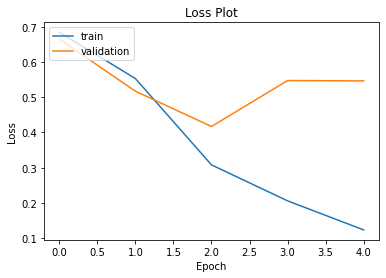

In [11]:
#Loss graph from history object
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

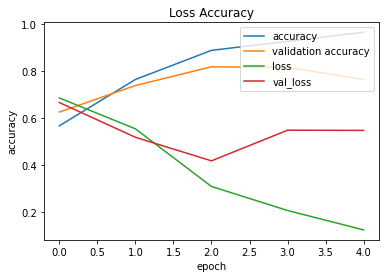

In [12]:
#Accuracy Loss graph from history object
plt.plot(accuracy_val.history['accuracy'])
plt.plot(accuracy_val.history['val_accuracy'])
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()

**Handling Overfitting**

In [9]:
# Using Early Stopping to handle Overfitting

from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# In min mode, training will stop when the quantity monitored has stopped decreasing
#verbosity mode

accuracy_val_early_stop = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test,y_test), callbacks=[es])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1556 samples, validate on 389 samples
Epoch 1/5
1556/1556 [==============================] - 579s 372ms/step - loss: 0.6891 - accuracy: 0.5296 - val_loss: 0.6789 - val_accuracy: 0.6118
Epoch 2/5
1556/1556 [==============================] - 594s 382ms/step - loss: 0.6524 - accuracy: 0.6915 - val_loss: 0.6457 - val_accuracy: 0.6144
Epoch 3/5
1556/1556 [==============================] - 595s 383ms/step - loss: 0.5633 - accuracy: 0.7461 - val_loss: 0.5695 - val_accuracy: 0.7069
Epoch 4/5
1556/1556 [==============================] - 593s 381ms/step - loss: 0.3811 - accuracy: 0.8458 - val_loss: 0.4914 - val_accuracy: 0.7969
Epoch 5/5
1556/1556 [==============================] - 596s 383ms/step - loss: 0.2165 - accuracy: 0.9190 - val_loss: 0.5038 - val_accuracy: 0.7841
Epoch 00005: early stopping


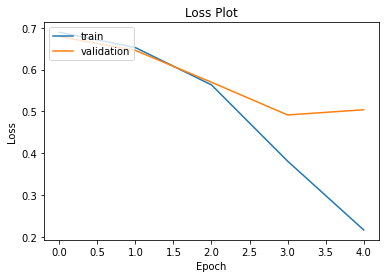

In [10]:
# Loss graph from history object
plt.plot(accuracy_val_early_stop.history['loss'])
plt.plot(accuracy_val_early_stop.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

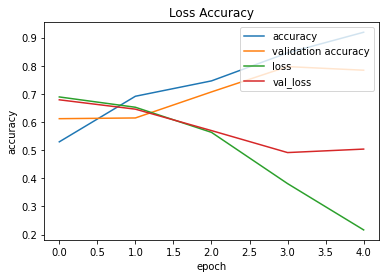

In [11]:
# Accuracy Loss graph from history object
plt.plot(accuracy_val_early_stop.history['accuracy'])
plt.plot(accuracy_val_early_stop.history['val_accuracy'])
plt.plot(accuracy_val_early_stop.history['loss'])
plt.plot(accuracy_val_early_stop.history['val_loss'])
plt.title('Loss Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()